In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
# reading the data
db = pd.read_csv('bikes.csv')

In [3]:
db.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [4]:
db.shape

(191, 5)

In [5]:
db.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

# Exploratory data analysis

In [6]:
db.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


#### check and remove skewness from dataset by using feature transformation

In [7]:
db.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
count          0.153032
dtype: float64

In [8]:
db.kurtosis()

temperature   -1.329092
humidity       0.707515
windspeed     -0.242824
count         -1.283352
dtype: float64

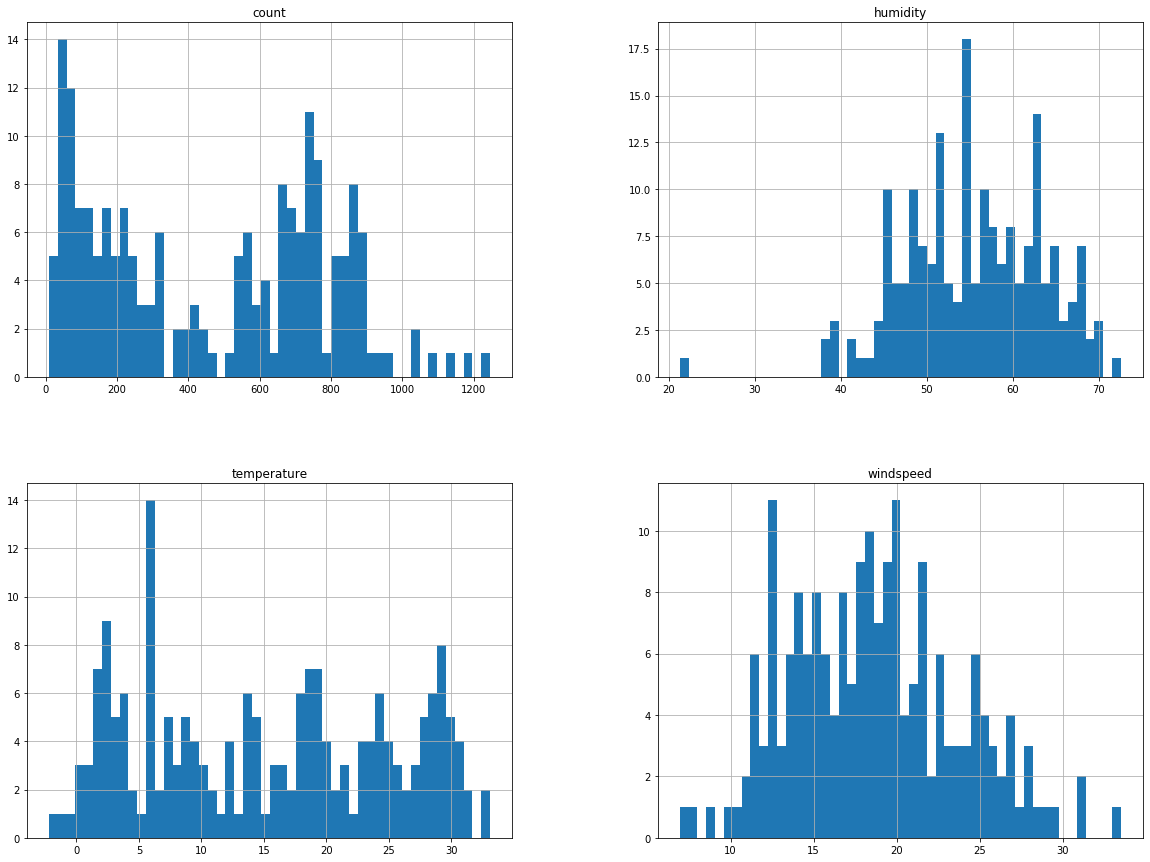

In [9]:
db.dropna().hist(bins=50,figsize=(20,15))
plt.show()

all features are nearly to normal distribution.

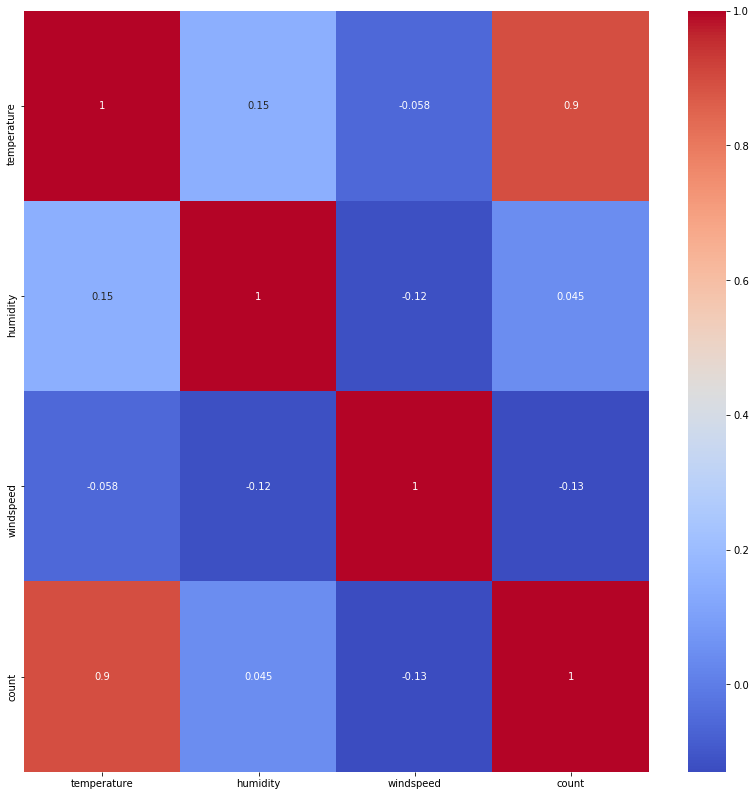

In [10]:
corr = db.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr,annot = True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap = "coolwarm")

In [11]:
db.corr()

,temperature,humidity,windspeed,count
temperature,1.000000,0.152391,-0.058493,0.897247
humidity,0.152391,1.000000,-0.119008,0.044918
windspeed,-0.058493,-0.119008,1.000000,-0.130064
count,0.897247,0.044918,-0.130064,1.000000


as we can see that the highest correlation between count and temperature is 0.89.

# Quantitative Features vs. Rental Counts
lets create scatter plots of all our float data types and compare them against rental counts to visualize potential relationship

Text(0, 0.5, 'Count of all Biks Rented')

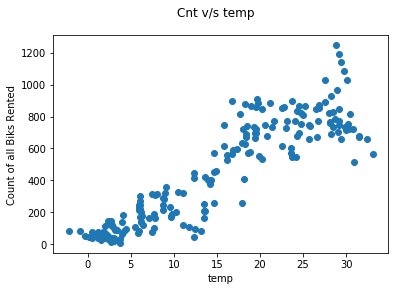

In [12]:
plt.scatter(db['temperature'], db['count'])
plt.suptitle('Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

As per the scatter plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented

Text(0, 0.5, 'Count of all Biks Rented')

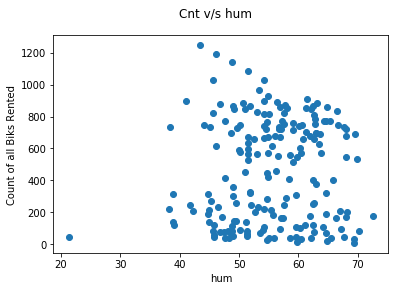

In [13]:
plt.scatter(db['humidity'], db['count'])
plt.suptitle('Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

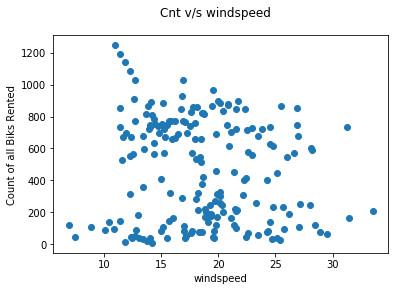

In [14]:
plt.scatter(db['windspeed'], db['count'])
plt.suptitle('Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

For  humidity looks like a big blob throught the edges so show some sparseness. and for feature 'windspeed' shows inverse relationship with rentals

# Model with linear regression

In [15]:
X=db.drop(['date','count'],axis=1)
Y=db['count']

In [16]:
#spliting data into train and test portion
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [17]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

In [18]:
#training model in training set
lr_model.fit(X_train, Y_train)
# making predection using the test set
y_pred = lr_model.predict(X_test)

In [19]:
#root mean squared error
print('RMSE:%.2f' % sqrt(mean_squared_error(Y_test, y_pred)))

RMSE:143.68


### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning


In [24]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.5, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.8989958717237754

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_RMSE across ALL models:
 24.342536840619836

 The test_RMSE across 

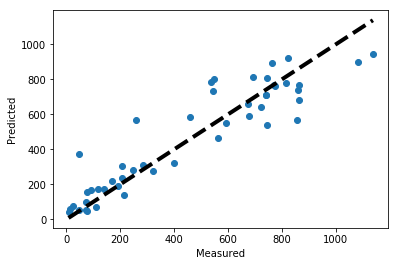

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.901985699384577

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}

 The train_RMSE across ALL models:
 18.731736299816873

 The test_RMSE across ALL models:
 127.16237583882801

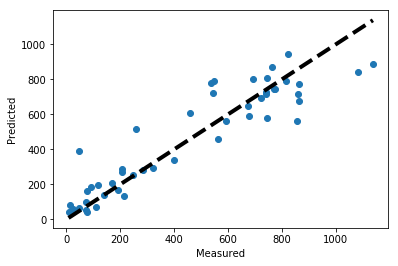

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8930463475710455

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 50}

 The train_RMSE across ALL models:
 43.377470538321674

 The test_RMSE across ALL models:
 127.21568714716393


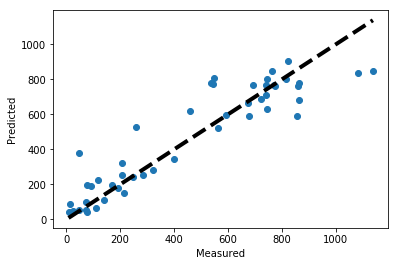

None



In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, Y_test,X_train,Y_train,parameters[i])

#### bar plot of features importances

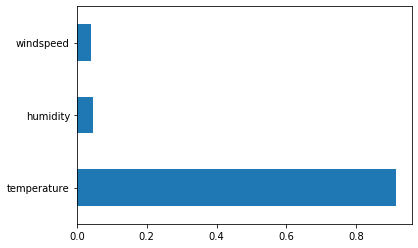

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

here,'temperature' features is important for model.

## save model

In [21]:
import pickle

In [22]:
filename='bike_GradientBoostingRegressor_model.sav'

In [23]:
pickle.dump(model, open(filename, 'wb'))

In [24]:
load_lr_model =pickle.load(open(filename, 'rb'))